In [2]:
import torch
import numpy as np
import scipy.stats
import scipy.ndimage
import matplotlib.pyplot as plt
from PIL import Image
import cv2

In [3]:
def fisher(gt:torch.tensor,preds:torch.tensor):
    
    """
    Takes in the ground truth mask and the predicted mask in the form of a tensor array
    1. Convert to greyscale(?)
    2. Convert to histogram
    3. Normalise the histogram
    4. Get probability density function of the histogram
    5. Profit
    """
    gt_raw = gt
    preds_raw = preds
    grey_truth = Image.fromarray(np.uint8(gt_raw)).convert("L")
    grey_preds = Image.fromarray(np.uint8(preds_raw)).convert("L")

    # Conver to histogram
    # for i in grey_truth:
        

In [4]:
def img_gen():
    image = np.random.randint(0,255,(16,16,3))
    return image

In [5]:
array1 = img_gen()
array2 = img_gen()

In [6]:
# plt.imshow(img1)
# # plt.imshow(img2)
# # array1.shape
# img1 = Image.fromarray(np.uint8(array1))
# img2 = Image.fromarray(np.uint8(array2))
# img1 = img1.convert(mode="L")
# img2 = img2.convert(mode="L")

In [7]:
# grey1 = np.array(img1)
# grey2 = np.array(img2)

In [8]:
# hist1,bin_edges1 = np.histogram(img1,bins=256,range=(0,1))

In [9]:
# plt.figure()
# plt.hist(grey1,bins=255,range=(0,255))
# # plt.plot(img1)
# plt.show()

In [10]:
# # Normalise the histogram
# norm_grey1 = []
# # grey1.shape
# print(grey1)
# # for pixel in grey1:
    

In [11]:
# test = (grey1/255)
# test2 = (grey2/255)
# print(test)

In [12]:
# gauss = scipy.stats.gaussian_kde(test)

In [13]:
# test[0]

In [14]:
# gauss.pdf(test2[0])

In [15]:
# a,b =  np.histogram(grey1,255,range=(0,255),density=True)
# print(a)
# print(b)

In [16]:
# mask and mask 2 are the same image
mask = Image.open("mask.jpeg")
mask2 = Image.open("mask2.jpeg")

In [17]:
mask_array = np.array(mask)
# mask_array= mask_array/255
# Make the 2nd mask a little different
mask_array2 = np.array(mask2)
# mask_array2 += 10


In [18]:
np.amax(mask_array)


255

In [19]:
hist1,bin1 = np.histogram(mask_array,bins=256,range=(0,1),density=False)
hist2,bin2 = np.histogram(mask_array2,bins=256,range=(0,1),density=False)

Text(0.5, 0, 'Pixel value')

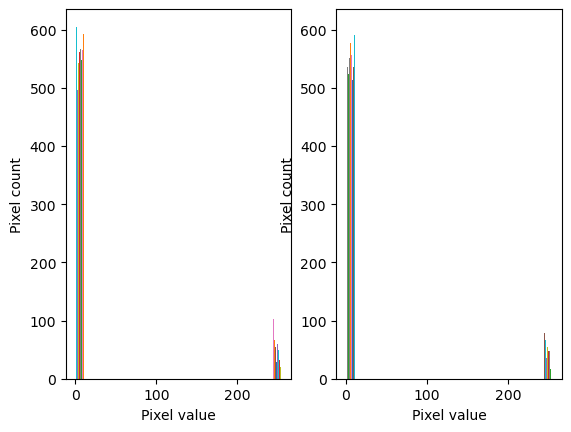

In [20]:
fig,axes = plt.subplots(nrows=1,ncols=2)
axes[0].hist(mask_array,bins="auto")
axes[0].set_ylabel("Pixel count")
axes[0].set_xlabel("Pixel value")
axes[1].hist(mask_array2,bins="auto")
axes[1].set_ylabel("Pixel count")
axes[1].set_xlabel("Pixel value")

In [21]:
pdf1,bins1 = np.histogram(mask_array,bins=256,range=(0,255),density=True)
pdf2,bins2 = np.histogram(mask_array2,bins=256,range=(0,255),density=True)

<BarContainer object of 256 artists>

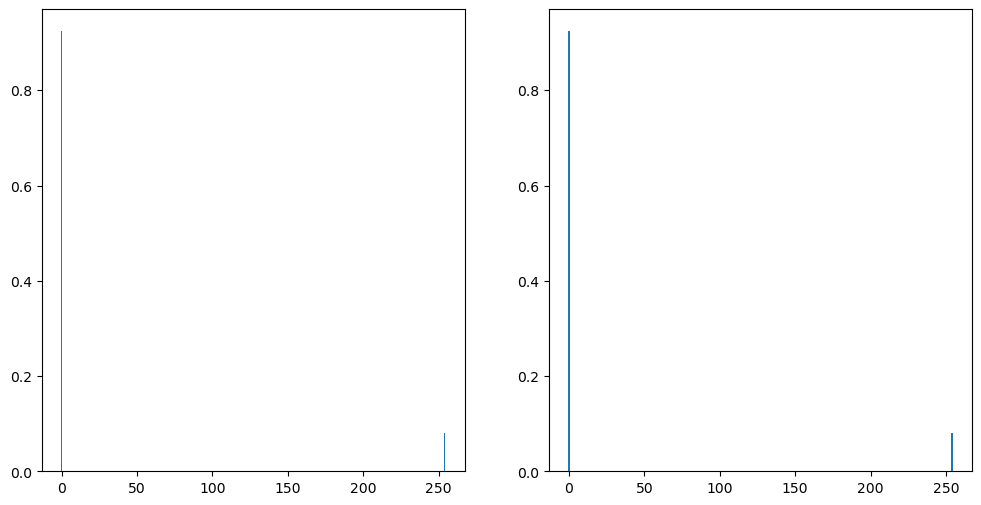

In [22]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
axes[0].bar(bins1[0:-1],pdf1)
axes[1].bar(bins2[0:-1],pdf2)

In [23]:
pdf1

array([0.92379986, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [24]:
battacharya = np.sqrt((pdf1*pdf2))
print(battacharya)

[0.92379986 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

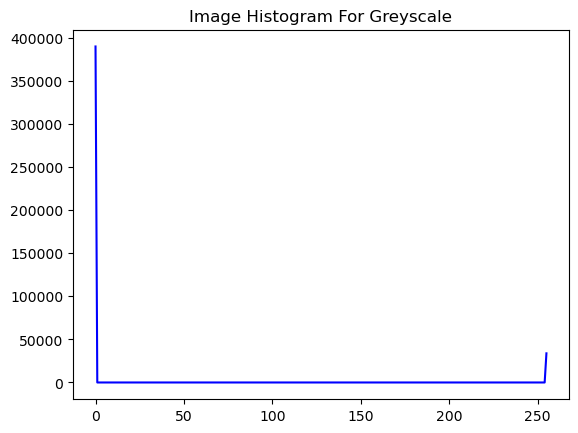

In [39]:
# Using CV2
image = cv2.imread("image.jpeg")
image_grey = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
image_hist = cv2.calcHist([image_grey],[0],None,[256],[0,256])

mask = cv2.imread("mask.jpeg")
mask_grey = cv2.cvtColor(mask,cv2.COLOR_BGR2GRAY)
mask_hist = cv2.calcHist([mask_grey],[0],None,[256],[0,256])

one = cv2.imread("Image_01L_1stHO.png")
one_grey = cv2.cvtColor(one,cv2.COLOR_BGR2GRAY)
one_hist = cv2.calcHist([one_grey],[0],None,[256],[0,256])

two = cv2.imread("Image_01L_2ndHO.png")
two_grey = cv2.cvtColor(two,cv2.COLOR_BGR2GRAY)
two_hist = cv2.calcHist([two_grey],[0],None,[256],[0,256])

plt.plot(mask_hist, color='b')
plt.title('Image Histogram For Greyscale')
plt.show()

In [40]:
cv2.compareHist(image_hist,image_hist,cv2.HISTCMP_BHATTACHARYYA)

0.0

In [41]:
cv2.compareHist(image_hist,mask_hist,cv2.HISTCMP_BHATTACHARYYA)

0.9981930317133252

In [42]:
cv2.compareHist(one_hist,two_hist,cv2.HISTCMP_BHATTACHARYYA)

0.005614493119210465

In [44]:
one_hist.shape

(256, 1)

In [50]:



from math import log2


def kl_divergence(p,q):
    return sum(p[i] * log2(p[i]/q[i]) for i in range(len(p)))

In [56]:
a = pdf1[0]
b = pdf1[-1]
x = pdf2[0]
y = pdf2[-1]
test1 = [a,b]
test2 = [x,y]
test_kl = kl_divergence(test1,test2)
test_kl
# print(a)
# print(b)
# print(x)
# print(y)
# print(test1)


0.0

In [73]:
img_a = Image.open("Image_01L_1stHO.png")
img_b = Image.open("Image_01L_2ndHO.png")
# img_b = Image.open("mask.jpeg")

img_a_array = np.array(img_a)
img_b_array = np.array(img_b)

pdf1,bins1 = np.histogram(img_a_array,bins=256,range=(0,255),density=True)
pdf2,bins2 = np.histogram(img_b_array,bins=256,range=(0,255),density=True)

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


In [74]:
tester_a = [pdf1[0],pdf1[1]]
tester_b = [pdf2[0],pdf2[1]]
# tester_b = [pdf2[0],pdf2[-1]]


In [75]:
kl = kl_divergence(tester_a,tester_b)
kl

0.00018429837923496142

In [72]:
pdf2

array([0.92379986, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [45]:

import torch


In [48]:
one_t = torch.from_numpy(one_hist)
two_t = torch.from_numpy(two_hist)
coef = torch.sqrt(one_t * two_t)
coef = torch.sum(coef)
coef

tensor(959009.7500)

In [49]:
dist = -torch.log(coef)
dist

tensor(-13.7737)